# `Segundo Bloque`

Interpolación, splines y una segunda mirada al cálculo numérico.
- El problema a resolver.
- Interpolación.
    - Interpolación polinomial
        - Base monomial
        - Interpolación de Lagrange
        - Interpolación polinomial de Newton
        - Interpolación cúbica-Spline
- Comparación con `SciPy`

## El problema a resolver

En muchas ocasiones nos enfrentamos a situaciones donde no tenemos una expresión analítica, sino valores discretos que describen cierto comportamiento. Usualmente estos valores discretos no están equiespaciados siendo necesario ''conocer'' en muchas ocasiones el valor correspondiente a un punto no reportado. En estos casos se puede proceder por dos vías, realizar una INTERPOLACIÓN de los datos, o realizar un FITTING a un modelo teórico.

<center><img src="capturas/126.png"></center>

En esta clase nos centraremos en el primero de ellos, la `INTERPOLACIÓN`.

Básicamente, el objetivo del presente aproximar una función $f(x)$ mediante un conjunto de $n$ funciones básicas $\phi_k(x)$ que, combinado con un conjunto de $n$ parámetros indeterminados $c_k\; (k = 0, 1,..., n − 1)$ se utiliza para producir los datos. Matematicamente tendremos que:
$$
p(x)=\sum_{k=0}^{n-1}c_k \phi_k(x)
$$
donde $p(x)$ representa la aproximación de la función desconocida y las funciones $\phi_k(x)$ son linealmente independientes.


## Interpolation

Supongamos que tenemos un conjunto de datos $x_i$ independiente y $y_i$ dependientes, con $i=1, 2, ...$. Nos gustaría encontrar una función de estimación $y(x)$ tal que $y(x_i)=y_i$ para cada punto de nuestro conjunto de datos. Esto significa que la función de estimación pasa por nuestros puntos de datos. Dado un nuevo $x_{new}$ podemos **interpolar** su valor usando $y(x_{new})$. En este contexto,  $y(x)$ se llama función de interpolación. La siguiente figura muestra el enunciado del problema de interpolación.
<center><img src="capturas/fig1.png"></center>

La interpolación no requiere que el usuario tenga un modelo subyacente para los datos, especialmente cuando hay muchos puntos de datos confiables. Sin embargo, los procesos que subyacen a los datos deben informar al usuario sobre la calidad de la interpolación. Por ejemplo, nuestros datos pueden consistir en coordenadas (x,y) de un automóvil a lo largo del tiempo. Dado que el movimiento está restringido a la física de maniobra del automóvil, podemos esperar que los puntos entre las coordenadas (x,y) en nuestro conjunto sean “suaves” en lugar de irregulares.

**En otras palabras**

La interpolación surge cuando tenemos como entrada una conjunto de datos, $(x_j, y_j)$ para $j = 0, 1,. . . , n − 1$, que suponemos representa exactamente la $f(x)$ subyacente. Se definirán las funciones base $\phi_k(x)$ y se intentará determinar los $n$ parámetros $c_k$. NOTAR como tenemos $n$ incógnitas y $n$ puntos de datos, por lo que podemos determinar todos los parámetros desconocidos exigiendo que nuestra función de aproximación $p(x)$ pase exactamente por los puntos de datos de entrada (excepto por el error de redondeo), es decir:
$$
y_j=\sum_{k=0}^{n-1}c_k\phi_k(x_j)
$$
donde se uso que $p(x_j)=y_j$. En forma matricial se tendría que $\Phi C = Y$ 
<center><img src="capturas/127.png"></center>

NÓTESE que una ves definida las funciones $\phi_k$ se puede resolver el sistema de ecuaciones. Como se puede inferir un interpolador de no es único (aunque cada interpolador tiene que pasar por los puntos de datos) ya que depende de cómo se escojan las funciones $\phi_k$. Sin embargo, las funciones escogidas deben cumplir ciertos criterios como suavidad, monotonicidad, etc. Es decir, el interpolante debe comportarse `razonablemente`. En este curso nos centraremos en tres enfoques diferentes para los interpolantes:
- `Interpolación polinomial`: este enfoque, supone que un solo polinomio puede capturar eficiente y efectivamente el comportamiento de la función subyacente. **Ésta es una gran suposición**.
- `Interpolación polinómica por partes`: este enfoque divide los puntos de datos en subintervalos y se emplea un polinomio de bajo grado diferente en cada subintervalo.
- `Interpolación trigonométrica`: este enfoque se utiliza para el caso de datos periódicos. Como veremos será necesario introducir uno de los algoritmos más famosos que existen, la transformada rápida de Fourier.


### Interpolación polinomial

La interpolación polinomial se refiere al caso en el que la función de interpolación $p(x)$ es un polinomio, note que la función subyacente $f(x)$ que está intentando aproximar no tiene por qué ser un polinomio, puede ser cualquier cosa.

#### Base monomial

La elección más simple y natural para las funciones base $φ_k(x)$ es utilizar monomios:
$$φ_k(x)=x^k$$

<center><img src="capturas/128.png"></center>

Usando la elección anterior tendremos que el polinomio de interpolación $p(x)$ toma la forma:
$$
p(x)=c_0 + c_1 x+ c_2 x^2+\dots + c_{n-1} x^{n-1}
$$

La forma más ingenua para encontrar las incógnitas es evaluar el polinomio en los puntos, es decir:
<center><img src="capturas/129.png"></center>

lo que se traduce a:
<center><img src="capturas/130.png"></center>

Esta matriz de coeficientes $n \times n$ (no simétrica) se conoce como matriz de `Vandermonde`. El determinante de una matriz de Vandermonde es distinto de cero para distintos nodos $x_j$; por tanto, una matriz de Vandermonde no es singular. Como resultado, las columnas de la matriz de Vandermonde son linealmente independientes. Esto significa que si emplea operaciones $O(n^3)$ como máximo para encontrar los parámetros $c_k$.

#### Interpolación de Lagrange

La interpolación de Lagrange se introduce en la mayoría de los libros de texto sobre métodos numéricos. Sin embargo, después de algunos comentarios introductorios, el enfoque generalmente se abandona por otros métodos, por ejemplo, la interpolación de Newton (es un caso particular), típicamente después de afirmar que la forma de Lagrange es buena para demostrar teoremas pero no tiene valor práctico. Como veremos, la interpolación de Lagrange es útil tanto formalmente como en la práctica.

Antes de discutir cómo realizar la interpolación, introduzcamos lo que se conoce como puntos cardinales o Lagrange o polinomios fundamentales (lo vimos anteriormente).
$$
L_k(x)=\frac{\prod_{j=0, j\neq k}^{n-1}(x-x_j)}{\prod_{j=0, j\neq k}^{n-1}(x_k-x_j)}, \quad k=0, 1, \dots, n-1
$$

Notar que el denominador solo depende de $x_j$, es decir, de los puntos de interpolación, por lo que es claramente una constante (no depende de x). El numerador es un polinomio en $x$ de grado $n − 1$. El polinomio de Lagrange $L_k(x)$ es $1$ en $x_k$, ya que el numerador y el denominador son iguales entre sí en ese caso y cero para un $k$ dado en $x_j$ cuando $j ≥ k$. Resumiendo
$$
L_k(x_j)=\delta_{kj}.
$$

Veamos unos ejemplos. Independientemente de dónde se coloquen los $x_j$, así es como se ven los tres polinomios de Lagrange para el caso de $n = 3$:
<center><img src="capturas/131.png"></center>

Utilizando los polinomios cardinales como funciones base; es decir $\phi_k(x) = L_k(x)$ tendremos
<center><img src="capturas/132.png"></center>

como se aprecia no necesitamos usar $c_k$ en nuestra definición del polinomio de interpolación, ya que simplemente podemos escribir $y_k$ (los valores y de nuestros datos de entrada) en su lugar. Para ver por qué esto está permitido, examinemos el valor de $p(x)$ en nuestros nodos:
<center><img src="capturas/133.png"></center>

Como se aprecia llegamos a la igualdad $p(x_j) = y_j$, lo cual es la definición de lo que significa ser un polinomio de interpolación. Esto conlleva a no tener que incluir $c_k$ al utilizar polinomios cardinales (que van a $0$ y a $1$ en los lugares correctos) en lugar de monomios. 

`Con este resultado hemos logrado evitar encontrarnos con una matriz de Vandermonde (posiblemente mal condicionada)`, sin embargo, el costo computacional es alto $O(n^2)$ cada vez que se evalua en un punto $x$. Para simplificar este problema se suele utilizar la `fórmula baricentríca de interpolación` (barycentric interpolation formula). 
<center><img src="capturas/134.png"></center>

donde los pesos $w_k$ se definen como
<center><img src="capturas/135.png"></center>

Observe que las dos sumas son casi idénticas: la primera involucra los valores de los datos de entrada $y_k$, mientras que la segunda no. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Implementación:
def weights(dataxs):
    n = dataxs.size
    ws = np.ones(n)
    for k in range(n):
        for j in range(n):
            if j == k:
                continue
            ws[k] *= (dataxs[k]-dataxs[j])
    return 1/ws

def bary(dataxs, datays, ws, x):
    k = np.where(x == dataxs)[0]
    if k.size == 0:
        nume = np.sum(ws*datays/(x-dataxs))
        denom = np.sum(ws/(x-dataxs))
        val = nume/denom
    else:
        val = datays[k[0]]
    return val

In [3]:
# Range función
func = lambda x: 1/(1+25*x**2)

# generando datos ficticios
def generatedata(n, f, nodes="cheb"):
    if nodes=="cheb":
        dataxs = -np.cos(np.linspace(0,np.pi,n))
    else:
        dataxs = np.linspace(-1,1,n) 
    
    datays = f(dataxs)
    return dataxs, datays

In [4]:
dataxs, datays = generatedata(15, func)
ws = weights(dataxs)
x = 0.3
pofx = bary(dataxs, datays, ws, x)

print(x, pofx, func(x))

dataxs, datays = generatedata(30, func)
ws = weights(dataxs)
pofx = bary(dataxs, datays, ws, x)

print(x, pofx, func(x))

0.3 0.2592750581841138 0.3076923076923077
0.3 0.3091978256811317 0.3076923076923077


Como notamos, para $n=15$ la coincidencia no es muy buena, sin embargo para $n=30$ mejoró mucho.

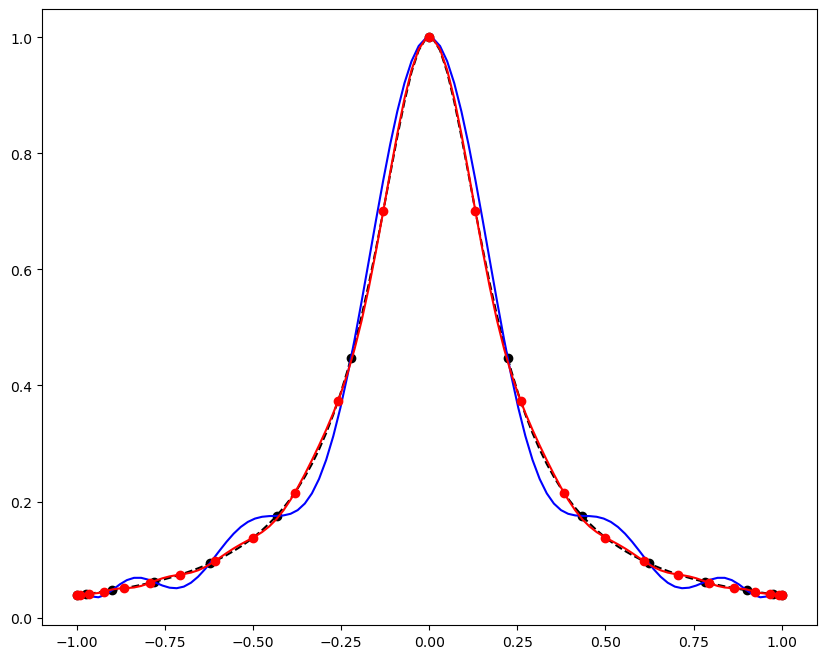

In [14]:
pof1x = lambda x, ws, dataxs, datays: bary(dataxs, datays, ws, x)
x = np.linspace(-1, 1, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 15 datos
dataxs, datays = generatedata(15, func)
ws = weights(dataxs)
daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ko')
plt.plot(x, daty, c='b')

# usando 25 datos
dataxs, datays = generatedata(25, func)
ws = weights(dataxs)
daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ro')
plt.plot(x, daty, c='r')

### Interpolación polinomial de Newton

La interpolación polinomial de Newton es otra forma popular de ajustar exactamente un conjunto de datos. La forma general del polinomio de Newton de orden $ n-1 $ que pasa por $ n $ puntos es:

$$ f(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \dots + a_n(x-x_0)(x-x_1)\dots(x-x_n)$$

que se puede reescribir como:

$$ f(x) = \sum_{i=0}^{n}{a_in_i(x)}$$ 

donde $$ n_i(x) = \prod_{j=0}^{i-1}(x-x_j)$$

La característica particular del polinomio de Newton es que los coeficientes $ a_i $ pueden determinarse mediante un procedimiento matemático muy simple que los casos anteriores. Por ejemplo, dado que el polinomio debe pasar por cada uno de los datos, $ (x_i, y_i) $, tendremos $ f (x_i) = y_i $, por lo que tendremos

$$f(x_0) = a_0 = y_0$$

y

$$
f(x_1) = a_0 + a_1(x_1-x_0) = y_1,
$$

reorganizándolo para obtener $ a_1 $, tendremos:
$$a_1 = \frac{y_1 - y_0}{x_1 - x_0}$$

Ahora, inserte los puntos de datos $ (x_2, y_2) $, podemos calcular $ a_2 $, y tiene la forma:
$$a_2 = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}$$

Hagamos un punto de datos más $ (x_3, y_3) $ para calcular $ a_3 $, después de insertar el punto de datos en la ecuación, obtenemos:

$$a_3 = \frac{\frac{\frac{y_3-y_2}{x_3-x_2} - \frac{y_2 - y_1}{x_2-x_1}}{x_3 - x_1} - \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1 - y_0}{x_1 - x_0}}{x_2-x_0}}{x_3 - x_0}$$


Ahora, ¿ves los patrones? Estos se denominan **diferencias divididas**, si definimos:

$$ f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$ f[x_2, x_1, x_0] = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_1}$$

Continuamos escribiendo esto, tendremos la siguiente ecuación de iteración:

$$ f[x_k, x_{k-1}, \dots, x_{1}, x_0] = \frac{f[x_k, x_{k-1}, \dots, x_{2}, x_2] - f[x_{k-1}, x_{k-2}, \dots, x_{1}, x_0]}{x_k-x_0}$$


Podemos ver una belleza del método es que, una vez que se determinan los coeficientes, agregar nuevos puntos de datos no cambiará los calculados, solo necesitamos calcular las diferencias más altas continúa de la misma manera. Todo el procedimiento para encontrar estos coeficientes se puede resumir en una tabla de diferencias divididas. Veamos un ejemplo usando 5 puntos de datos:

$$
\begin{array}{cccccc}
x_0 & y_0 \\
    &     & f[x_1,x_0] \\
x_1 & y_1 &             & f[x_2, x_1,x_0]\\
    &     & f[x_2,x_1]  &              & f[x_3, x_2, x_1,x_0]\\
x_2 & y_2 &             & f[x_3, x_2,x_1] &             & f[x_4, x_3, x_2, x_1,x_0]\\
    &     & f[x_3,x_2]  &              & f[x_4, x_3, x_2, x_1]\\
x_3 & y_3 &             & f[x_4, x_3,x_2]\\
    &     & f[x_4,x_3] \\
x_4 & y_4
\end{array}
$$

Cada elemento de la tabla se puede calcular utilizando los dos elementos anteriores (a la izquierda). En realidad, podemos calcular cada elemento y almacenarlos en una matriz diagonal, es decir, la matriz de coeficientes se puede escribir como:

$$
\begin{array}{cccccc}
y_0 & f[x_1,x_0] & f[x_2, x_1,x_0] & f[x_3, x_2, x_1,x_0] & f[x_4, x_3, x_2, x_1,x_0]\\
y_1 & f[x_2,x_1] & f[x_3, x_2,x_1] & f[x_4, x_3, x_2, x_1] & 0\\
y_2 & f[x_3,x_2] & f[x_4, x_3,x_2] & 0          & 0 \\
y_3 & f[x_4,x_3] & 0 & 0 & 0            \\
y_4 & 0 & 0 & 0  & 0  
\end{array}
$$

Tenga en cuenta que la primera fila de la matriz son en realidad todos los coeficientes que necesitamos, es decir, $ a_0, a_1, a_2, a_3, a_4 $. Veamos un ejemplo de cómo podemos hacerlo.

#### Ejercicio

Calcula la tabla de diferencias divididas para x = [-5, -1, 0, 2], y = [-2, 6, 1, 3].

In [5]:
def divided_diff(x, y):
    '''
    función para calcular el termino dividido
     tabla de diferencias
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1])/(x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluar el polinomio de newton
     en x 
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

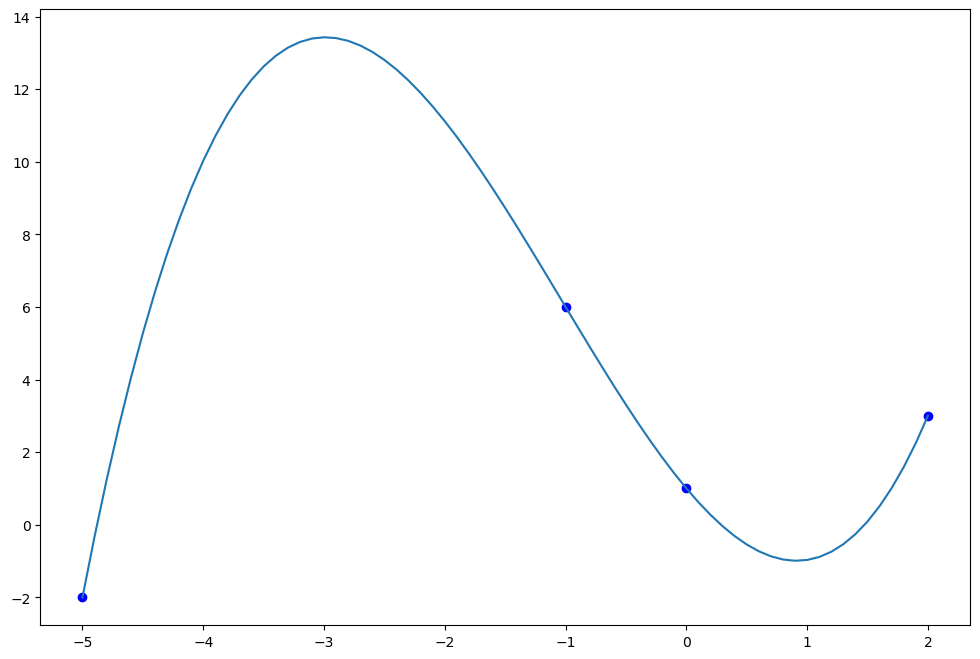

In [6]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

# obteniendo los coef
a_s = divided_diff(x, y)[0, :]

# evaluando los nuevos puntos
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

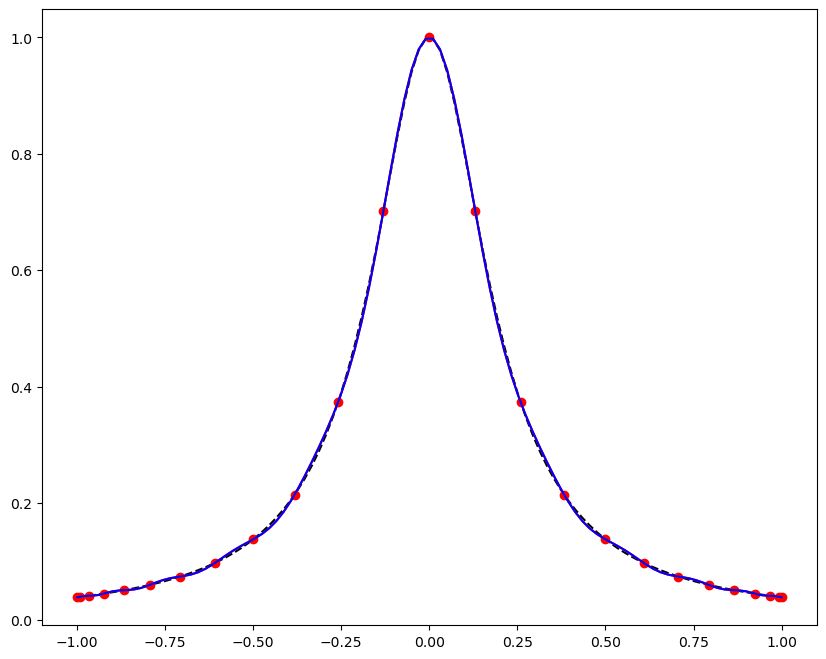

In [10]:
pof1x = lambda x, ws, dataxs, datays: bary(dataxs, datays, ws, x)
x = np.linspace(-1, 1, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 25 datos
dataxs, datays = generatedata(25, func)
ws = weights(dataxs)
a_s = divided_diff(dataxs, datays)[0, :]

daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ro')
plt.plot(x, daty, c='r')

y_new = newton_poly(a_s, dataxs, x)
plt.plot(x, y_new, c='b')

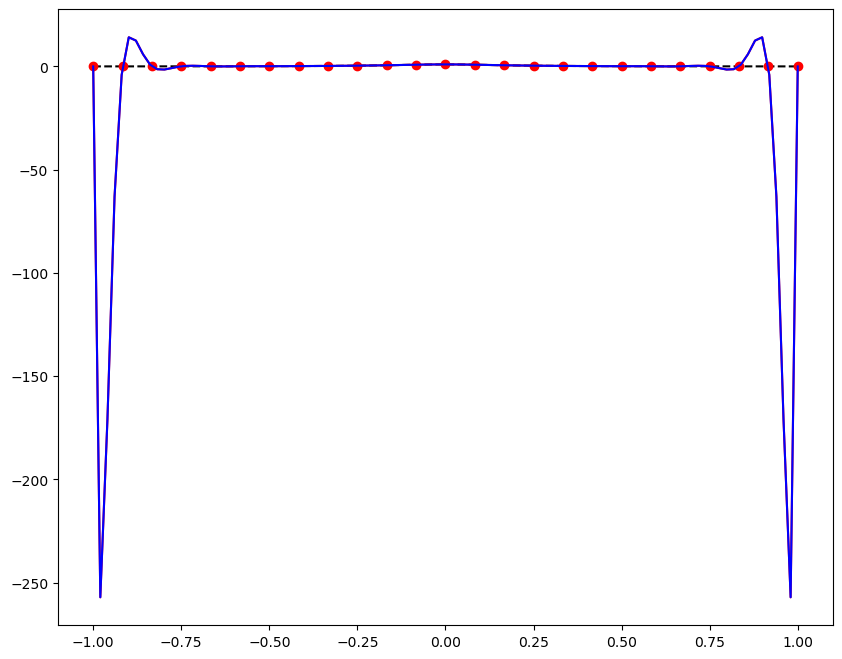

In [14]:
pof1x = lambda x, ws, dataxs, datays: bary(dataxs, datays, ws, x)
x = np.linspace(-1, 1, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 25 datos
dataxs, datays = generatedata(25, func, nodes='none')
ws = weights(dataxs)
a_s = divided_diff(dataxs, datays)[0, :]

daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ro')
plt.plot(x, daty, c='r')

y_new = newton_poly(a_s, dataxs, x)
plt.plot(x, y_new, c='b')

**¡¡¿Qué pasó arriba?!!**

El polinomio interpolador puede presentar comportamientos patológicos, en el sentido de que, cuando aumentamos el número de puntos de interpolación en un intervalo, la desviación máxima entre el polinomio y la función en dicho intervalo aumente con el grado del polinomio.

En este caso ocurrió al aumentar el grado del polinomio interpolado de estas funciones con puntos igualmente espaciados. Siempre que tengamos la libertad de escoger los puntos, la mejor elección es la que miminiza el error, en estos caso si se eligen los puntos de interpolación como los ceros de los polinomios de Chebychev, definidos por:
<center><img src="capturas/136.png"></center>

donde como se aprecia los ceros estarán definidos en el intervalo $[-1,1]$, así que para una función definida en un intervalo $[a, b]$ tendremos que realizar los cambios de variables
<center><img src="capturas/137.png"></center>

de tal forma que ahora se mapee $f(x)\to f(t)$ que toma valores dentro del intervalo $[-1,1]$.

¿Qué hacer sino tenemos libertad para escoger los puntos?

### Interpolación Lineal
En la interpolación lineal, se supone que el punto estimado se encuentra en la línea que une los puntos más cercanos a la izquierda y a la derecha. Suponga, sin pérdida de generalidad, que $x_i<x<x_{i+1}$. Entonces la interpolación lineal en $x$ es:

$y(x)=y_i+\frac{(y_{i+1}-y_{i})(𝑥−𝑥_i)}{x_{i+1}-x_i}$

La función `interp1d`, es la función en Scipy que nos permite hacer este tipo de interpolaciones.

- Ejercicio: Encuentre la interpolación lineal en $x=1.5$ para los datos  x = [0, 1, 2], y = [1, 3, 2]. Verifique el resultado usando la función `interp1` de scipy.

Respuesta:

Dado que $1<x<2$, usamos el segundo y tercer punto de datos para calcular la interpolación lineal.

$y(1.5)=3+\frac{(2-3)(1.5−1)}{2-1}=2.5$

### Interpolación Cúbica (Cubic Spline Interpolation)

En la interpolación **spline** cúbica (como se muestra en la siguiente figura), la función de interpolación es un conjunto de funciones cúbicas por partes. Específicamente, asumimos que los puntos $(x_i, y_i)$ y $(x_{i+1}, y_{i+1})$ están unidos por un polinomio cúbico $S_i(x)= a_i x^{3} + b_i x^{2}+ c_i x+ d_i$ que es válido para $x_i\leq x\leq x_{i+1}$ para $i = 1,..., n-1$. Para encontrar la función de interpolación, primero debemos determinar los coeficientes $a_i, b_i, c_i, d_i$ para cada una de las funciones cúbicas. Para $n$ puntos, hay que encontrar $n-1$ funciones cúbicas, y cada función cúbica requiere cuatro coeficientes. Por lo tanto, tenemos un total de $4(n-1)$ incógnitas, por lo que necesitamos $4(n−1)$ ecuaciones independientes para encontrar todos los coeficientes.
<center><img src="capturas/fig2.png"></center>

Primero sabemos que las funciones cúbicas deben intersecar los datos con los puntos de la izquierda y la derecha:
<center><img src="capturas/fig3.png"></center>

lo que nos da $2(n-1)$ ecuaciones. A continuación, queremos que cada función cúbica se una lo más suavemente posible con sus vecinas, por lo que restringimos las **splines** para que tengan una primera y segunda derivadas continuas en los puntos de datos $ i= 2,…, n-1$
<center><img src="capturas/fig4.png"></center>

lo que nos da $2(n-2)$ ecuaciones.

Se requieren dos ecuaciones más para calcular los coeficientes de $S_i(x)$. Estas dos últimas restricciones son arbitrarias y se pueden elegir para adaptarse a las circunstancias de la interpolación que se está realizando. Un conjunto común de restricciones finales es asumir que las segundas derivadas son cero en los puntos finales. Esto significa que la curva es una "línea recta" en los puntos finales. Explícitamente,
<center><img src="capturas/fig5.png"></center>

En Python, podemos usar la función `CubicSplin` de scipy para realizar la interpolación de splines cúbicos. Como comentario las restricciones anteriores no son las mismas que las utilizadas por `CubicSplin` de scipy por defecto para realizar splines cúbicos, hay diferentes formas de agregar las dos restricciones finales en scipy estableciendo el argumento **bc_type** (consultar la ayuda de `CubicSplin` para obtener más información sobre esto).

#### Ejercicio: 
Utilice `CubicSplin` para trazar la interpolación spline cúbica del conjunto de datos x = [0, 1, 2] e y = [1, 3, 2] para $0\leq x \leq 2$